# Employee Turnover Prediction Model

**Employee Turnover or Employee Turnover ratio is the measurement of the total number of employees who leave an organization in a particular year.**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
hr = pd.read_csv(r'C:\Users\Sahito\Downloads\py\HumanResources.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hr=hr.rename(columns = {'sales':'department'})


In [14]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   department              14999 non-null  object 
 9   salary                  14999 non-null  object 
 10  department_RandD        14999 non-null  uint8  
 11  department_accounting   14999 non-null  uint8  
 12  department_hr           14999 non-null  uint8  
 13  department_management   14999 non-null  uint8  
 14  department_marketing    14999 non-null

In [5]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [6]:
hr.shape

(14999, 10)

**The “left” column is the outcome variable recording 1 and 0. 1 for employees who left the company and 0 for those who didn’t.**

In [7]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

The department column of the dataset has many categories, and we need to reduce the categories for better modelling. Let’s see all the categories of the department column:

In [8]:
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

# Creating Variables for Categorical Variables
**As there are two categorical variables (department, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling.**

In [9]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

**Now the actual variables need to be removed after the dummy variable have been created. Column names after creating dummy variables for categorical variables:**

In [15]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

**The outcome variable is “left”, and all the other variables are predictors.**

In [16]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

# Feature Selection for Employee Turnover Prediction
**Let’s use the feature selection method to decide which variables are the best option that can predict employee turnover with great accuracy. There are a total of 18 columns in X, and now let’s see how we can select about 10 from them:**

In [21]:

rfe = RFE(model, n_features_to_select= 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Sahito\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sahito\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sahito\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


**You can see that or feature selection chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. Now lets have a look at these columns:**

In [26]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [34]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

# Model
**Logistic Regression**


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

**Accuracy of Logistic Regresion model**

In [35]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.771


**Random Forest Classification Model**

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

**accuracy of Random Forest Classification Model:**

In [38]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.979


**Confusion Matrix for our Machine Learning Models**

**Random Forest**

In [41]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



Text(0.5, 1.0, 'Random Forest')

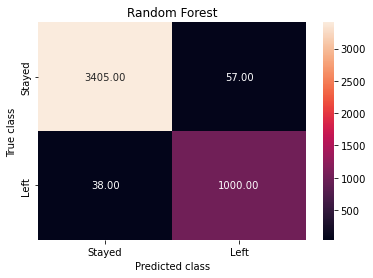

In [50]:
y_pred = rf.predict(X_test)
forest_cm = metrics.confusion_matrix( y_test, y_pred)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = [ "Stayed", "Left"] , yticklabels = [ "Stayed", "Left"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

**Logistic Regression Metrics**

In [51]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



Text(0.5, 1.0, 'Logistic Regression')

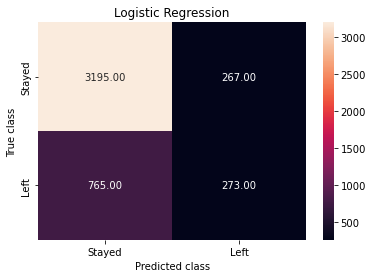

In [55]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(y_test,logreg_y_pred)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = [ "Stayed","Left"] , yticklabels = ["Stayed","Left",] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

# Employee Turnover Prediction Curve

**The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).**

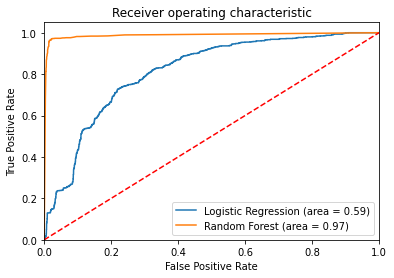

In [58]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover,** 
**now let’s have a look at the feature importance of our random forest classification model.**

In [59]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.25%
department_management-0.26%
department_hr-0.29%
department_RandD-0.32%
salary_high-0.66%
salary_low-1.20%
Work_accident-1.38%
last_evaluation-18.69%
time_spend_company-26.28%
satisfaction_level-50.66%


**According to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will leave the company**